In [1]:
from matplotlib import pyplot as plt
from matplotlib import rc

rc('font',**{'family':'Times New Roman'})
rc('mathtext', fontset='dejavusans')

In [2]:
fid_reverse = [
36.26,
47.90,
59.67,
70.90,
81.53,
91.40,
101.03,
127.01,
196.29,
254.61,
307.60,
349.82,
381.36,
405.07,
422.27,
434.09,
441.22,
445.72,
448.46,
449.85,
450.61,
451.02,
451.42,
451.29,
451.33,
451.34,
451.54,
]

fid_forward = [
10.28,
26.03,
40.64,
53.44,
64.98,
75.88,
85.92,
113.66,
188.24,
249.48,
304.26,
347.64,
380.27,
404.47,
421.89,
433.47,
441.13,
445.86,
448.41,
449.86,
450.58,
450.92,
451.03,
451.41,
451.26,
451.20,
451.48,
]

In [3]:
timestep = [1, 2, 3, 4, 5, 6, 7, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

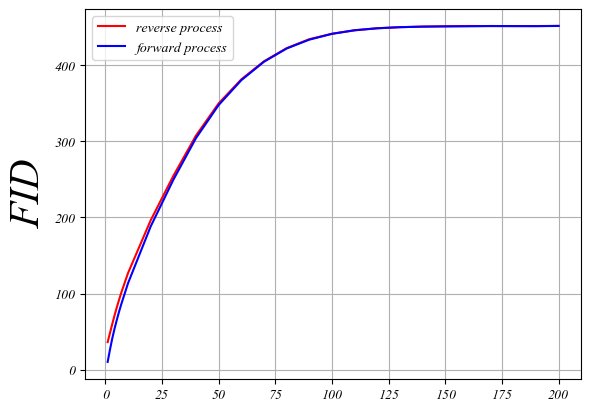

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

major_xticks = [0, 50, 100, 150, 200]
minor_xticks = [0, 25, 50, 75, 100, 125, 150, 175, 200]

major_yticks = [0, 100, 200, 300, 400]
minor_yticks = [0, 50, 100, 150, 200, 250, 300, 350, 400]
# ax.tick_params(axis='both', which='major', labelsize=30)
# ax.set_xticks(major_xticks)
# ax.set_xticks(minor_xticks, minor=True)
# ax.set_yticks(major_yticks)
# ax.set_yticks(minor_yticks, minor=True)
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 30,
        }
ax.set_ylabel("FID", fontdict=font)
ax.grid(which='both')
ax.plot(timestep, fid_reverse, color="red", label="reverse process")
ax.plot(timestep, fid_forward, color="blue", label="forward process")
ax.legend()

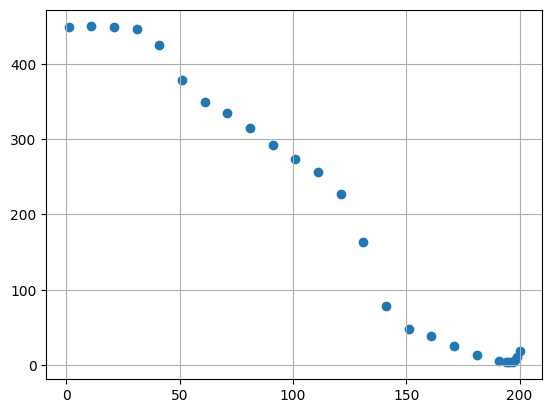

In [12]:
plt.scatter([201-i for i in timestep], fid)
plt.xticks([0, 50, 100, 150, 200])
plt.grid(which='both')

In [15]:
import numpy as np

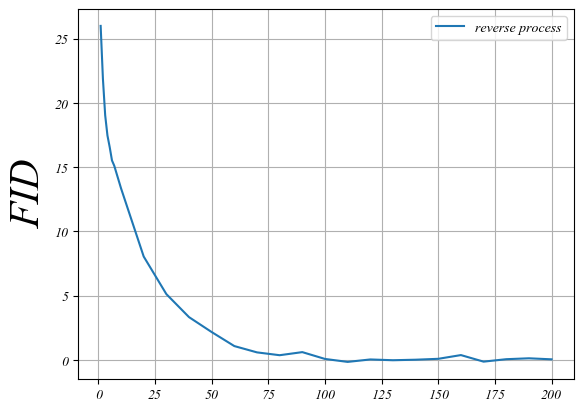

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

major_xticks = [0, 50, 100, 150, 200]
minor_xticks = [0, 25, 50, 75, 100, 125, 150, 175, 200]

major_yticks = [0, 100, 200, 300, 400]
minor_yticks = [0, 50, 100, 150, 200, 250, 300, 350, 400]
# ax.tick_params(axis='both', which='major', labelsize=30)
# ax.set_xticks(major_xticks)
# ax.set_xticks(minor_xticks, minor=True)
# ax.set_yticks(major_yticks)
# ax.set_yticks(minor_yticks, minor=True)
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 30,
        }
ax.set_ylabel("FID", fontdict=font)
ax.grid(which='both')
ax.plot(timestep, np.array(fid_reverse)-np.array(fid_forward), label="reverse process")
# ax.plot(timestep, fid_forward, color="blue", label="forward process")
ax.legend()

## Corrected variance

In [1]:
import sys
sys.path.append("/Users/leo/projects/dropout-diffusion")
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np

rc('font',**{'family':'Times New Roman'})
rc('mathtext', fontset='dejavusans')

In [2]:
import argparse

from dropout_diffusion import dist_util, logger
from dropout_diffusion.image_datasets import load_data
from dropout_diffusion.resample import create_named_schedule_sampler
from dropout_diffusion.script_util import (
    add_dict_to_argparser,
    args_to_dict,
    create_model_and_diffusion,
    model_and_diffusion_defaults,
)
from dropout_diffusion.train_util import TrainLoop

/Users/leo/miniconda3/envs/dropout-diffusion/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
default_training = dict(
    data_dir="",
    schedule_sampler="uniform",
    lr=1e-4,
    weight_decay=0.0,
    lr_anneal_steps=0,
    batch_size=1,
    microbatch=-1,  # -1 disables microbatches
    ema_rate="0.9999",  # comma-separated list of EMA values
    log_interval=10,
    save_interval=10000,
    resume_checkpoint="",
    use_fp16=False,
    fp16_scale_growth=1e-3,
)

In [4]:
model_and_diffusion_default = dict(
    image_size=32,
    num_channels=128,
    num_res_blocks=2,
    num_heads=4,
    num_heads_upsample=-1,
    attention_resolutions="16,8",
    dropout=0.0,
    learn_sigma=False,
    sigma_small=False,
    class_cond=False,
    diffusion_steps=200,
    noise_schedule="exponential",
    timestep_respacing="",
    use_kl=False,
    predict_xstart=False,
    rescale_timesteps=True,
    rescale_learned_sigmas=True,
    use_checkpoint=False,
    use_scale_shift_norm=True,
    correct_sigma=False,
    weight_clipping=False,
    diffusion_dropout=0.0,
    predict_mean=False
)   

In [5]:
default_training.update(model_and_diffusion_default)

In [6]:
model, diffusion = create_model_and_diffusion(**model_and_diffusion_default)

In [7]:
schedule_sampler = create_named_schedule_sampler(default_training["schedule_sampler"], diffusion)

In [8]:
corrected_variance = """6.84837634e-08 2.54438621e-04 3.51177983e-04 4.08983356e-04
4.51611894e-04 4.86998160e-04 5.18556571e-04 5.48007003e-04
5.76316711e-04 6.04077103e-04 6.31675009e-04 6.59378360e-04
6.87382309e-04 7.15835621e-04 7.44856517e-04 7.74542585e-04
8.04977225e-04 8.36233939e-04 8.68379298e-04 9.01475023e-04
9.35579481e-04 9.70748815e-04 1.00703775e-03 1.04450024e-03
1.08318999e-03 1.12316080e-03 1.16446695e-03 1.20716343e-03
1.25130617e-03 1.29695226e-03 1.34416008e-03 1.39298949e-03
1.44350196e-03 1.49576070e-03 1.54983076e-03 1.60577920e-03
1.66367517e-03 1.72359000e-03 1.78559735e-03 1.84977331e-03
1.91619649e-03 1.98494816e-03 2.05611233e-03 2.12977588e-03
2.20602867e-03 2.28496370e-03 2.36667713e-03 2.45126854e-03
2.53884092e-03 2.62950092e-03 2.72335890e-03 2.82052912e-03
2.92112986e-03 3.02528358e-03 3.13311710e-03 3.24476169e-03
3.36035328e-03 3.48003267e-03 3.60394563e-03 3.73224312e-03
3.86508150e-03 4.00262267e-03 4.14503434e-03 4.29249020e-03
4.44517013e-03 4.60326048e-03 4.76695425e-03 4.93645134e-03
5.11195884e-03 5.29369125e-03 5.48187078e-03 5.67672762e-03
5.87850022e-03 6.08743562e-03 6.30378973e-03 6.52782770e-03
6.75982422e-03 7.00006386e-03 7.24884149e-03 7.50646260e-03
7.77324373e-03 8.04951284e-03 8.33560976e-03 8.63188659e-03
8.93870821e-03 9.25645271e-03 9.58551187e-03 9.92629166e-03
1.02792128e-02 1.06447113e-02 1.10232391e-02 1.14152642e-02
1.18212721e-02 1.22417656e-02 1.26772659e-02 1.31283134e-02
1.35954678e-02 1.40793094e-02 1.45804397e-02 1.50994821e-02
1.56370825e-02 1.61939108e-02 1.67706609e-02 1.73680524e-02
1.79868308e-02 1.86277691e-02 1.92916683e-02 1.99793586e-02
2.06917007e-02 2.14295865e-02 2.21939404e-02 2.29857204e-02
2.38059196e-02 2.46555667e-02 2.55357284e-02 2.64475096e-02
2.73920553e-02 2.83705522e-02 2.93842295e-02 3.04343608e-02
3.15222656e-02 3.26493106e-02 3.38169117e-02 3.50265349e-02
3.62796986e-02 3.75779751e-02 3.89229922e-02 4.03164352e-02
4.17600482e-02 4.32556364e-02 4.48050677e-02 4.64102748e-02
4.80732567e-02 4.97960812e-02 5.15808862e-02 5.34298823e-02
5.53453541e-02 5.73296634e-02 5.93852501e-02 6.15146354e-02
6.37204229e-02 6.60053015e-02 6.83720477e-02 7.08235286e-02
7.33627025e-02 7.59926244e-02 7.87164462e-02 8.15374211e-02
8.44589058e-02 8.74843652e-02 9.06173743e-02 9.38616246e-02
9.72209253e-02 1.00699212e-01 1.04300546e-01 1.08029124e-01
1.11889276e-01 1.15885489e-01 1.20022403e-01 1.24304804e-01
1.28737659e-01 1.33326112e-01 1.38075486e-01 1.42991301e-01
1.48079282e-01 1.53345369e-01 1.58795722e-01 1.64436746e-01
1.70275081e-01 1.76317619e-01 1.82571541e-01 1.89044276e-01
1.95743565e-01 2.02677420e-01 2.09854187e-01 2.17282516e-01
2.24971376e-01 2.32930064e-01 2.41168242e-01 2.49695905e-01
2.58523408e-01 2.67661495e-01 2.77121287e-01 2.86914234e-01
2.97052285e-01 3.07547786e-01 3.18413413e-01 3.29662386e-01
3.41308303e-01 3.53365298e-01 3.65847992e-01 3.78771459e-01
3.92151296e-01 4.06003691e-01 4.20345408e-01 4.35193756e-01
4.50566592e-01 4.66482613e-01 4.82960866e-01 5.00021472e-01"""

In [9]:
corrected_variance = corrected_variance.replace("\n", " ")

In [10]:
import re
corrected_variance = re.sub(" +", " ", corrected_variance)

In [11]:
corrected_variance = corrected_variance.split(" ")

In [12]:
corrected_variance = [float(item) for item in corrected_variance]

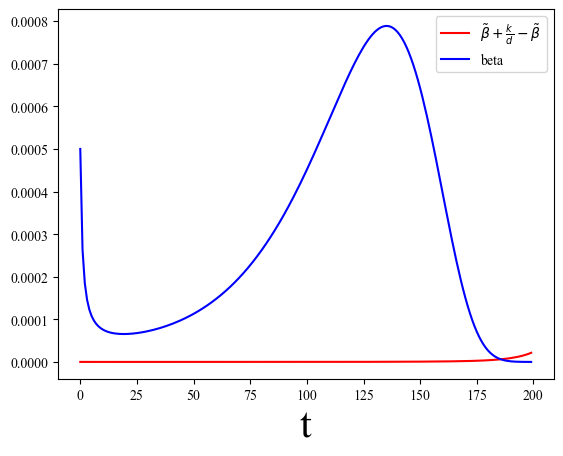

In [15]:
#plt.plot(np.array(corrected_variance) - diffusion.betas)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 30,
        }
ax.set_xlabel("t", fontdict=font)
ax.plot(np.array(corrected_variance) - diffusion.posterior_variance, color="red", label=r"$\tilde{\beta} + \frac{k}{d} - \tilde{\beta}$")
ax.plot(diffusion.betas - diffusion.posterior_variance, color="blue", label=r"$\beta - \tilde{\beta}$")
ax.legend()